In [34]:
%matplotlib inline
import matplotlib as lib
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
from altair import Chart, X, Y, Axis, SortField

# Data gathering and calculating in class without graphs

In [35]:
sfa=pd.read_csv('Data/sfa1314.csv')
name=pd.read_csv('Data/hd2014.csv',encoding='ISO-8859-1')
gr14=pd.read_csv('Data/gr2014.csv')

In [36]:
pf=pd.merge(sfa,name,left_on='UNITID',right_on='UNITID')
midwest=['IA','IL','MN','WI','MO','KS','MI','SD','OH','ND','NE']
def region(row):
    if row['STABBR'] in midwest:
        return "Midwest"
pf['Region']=pf.apply(region,axis=1)
pell=pf[pf.Region=="Midwest"].sort_values('PGRNT_P',ascending=False)[['UNITID','INSTNM','PGRNT_P']]
#take the pell grant data

In [38]:
x=gr14.pivot_table(columns='GRTYPE',values='GRTOTLT',index='UNITID')[[2,3]]
pfGr=pd.merge(pf,x,left_on='UNITID',right_index=True)
pfGr.fillna(0,inplace=True)
def getPcGrd(row):
    if row[2]==0:
        return 0
    else:
        return float(row[3])/float(row[2])*100
pfGr['%Grad6']=pfGr.apply(getPcGrd,axis=1)
pfGr['PGrad6']=pfGr['PGRNT_P']/100*pfGr['%Grad6']
pf=pfGr
pfGr=pf[pf.Region=='Midwest'].sort_values('PGrad6',ascending=False)[['INSTNM','UNITID','PGrad6']]
#calculate student grad in 6 years and have pell grants

# Plot average net price for students from family with income 30k-48k and 48k-75k in Midwest

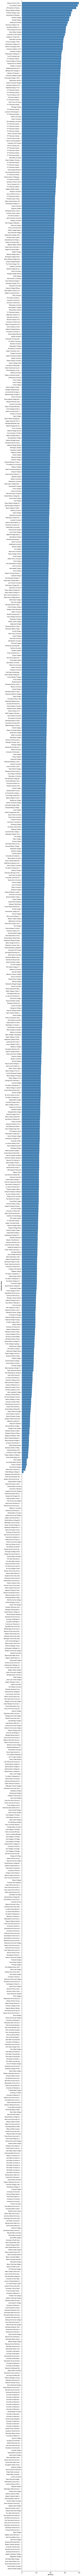

In [39]:
pf['Average']=(pf['NPT432']+pf['NPT422'])/2 #calculating  net price, which is the average of middle class income
npm=pf[pf.Region=='Midwest'].sort_values('Average',ascending=False)[['INSTNM','UNITID','Average']]
Chart(npm).mark_bar().encode(
    y=Y('INSTNM',sort=SortField(field='amount', order='descending'),
        axis=Axis(title='Institution Name')),
     x=X('Average',
        axis=Axis(title='Net Price'))
)
#graph the net price

In [43]:
pfGr.head()

,INSTNM,UNITID,PGrad6
1248,St Luke's College,154262,100.000000
1186,Allen College,152798,75.000000
4623,Wright Career College,406200,72.765957
2784,Hondros College,203386,61.328571
5296,Pacific College of Oriental Medicine-Chicago,442842,57.000000


In [60]:
apg=pfGr['PGrad6'].mean() #calculate the mean of student graduate within 6 years with Pell grants 
anp=npm[npm.Average!=0]['Average'].mean() #calculate the mean of net price 
anp

16987.618464052288